In [61]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Load the dataset
file_path = '/content/retail_sales_dataset.csv'
df = pd.read_csv(file_path)

In [82]:
df.shape

(1000, 8)

In [64]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


The Date column is of object type. Hence it is converted to datetime for further processing.

In [66]:
# Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])

In [67]:
# Check for missing values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

There are no null values in the dataset.

In [68]:
#Checking for duplicates
df.duplicated().sum()

0

There are no duplicate values in the dataset.

In [69]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

#Calculate mode
print("\nMode Statistics:")
print(df.mode().iloc[0])

# Calculate standard deviation for numeric columns
print("\nStandard Deviation:")
df[['Quantity', 'Price per Unit', 'Total Amount']].std()

Descriptive Statistics:
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000

Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64

The describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc). It does not include mode, hence I have found the mode separately.

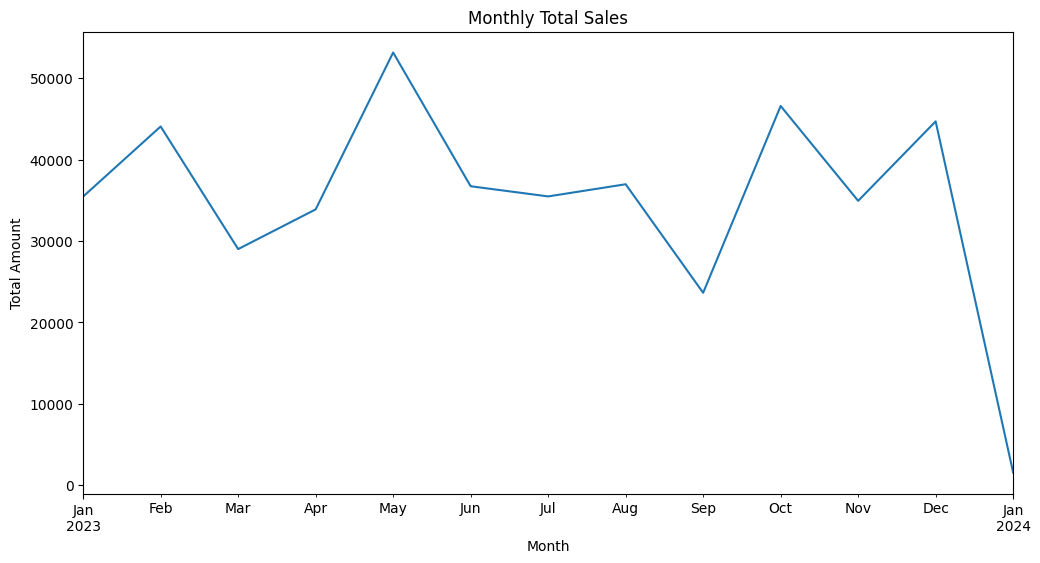

In [70]:
# Time Series Analysis
df.set_index('Date', inplace=True)
monthly_sales = df['Total Amount'].resample('M').sum()
monthly_sales.plot(figsize=(12, 6))
plt.title('Monthly Total Sales')
plt.ylabel('Total Amount')
plt.xlabel('Month')
plt.show()

From the above graph, we can see that the sales(total amount) was at peak in the month of May.
The monthly sales data shows a clear increasing trend from March to May, followed by a slight decline in March and September. May month shows the highest sales, which must have been probably driven by summer discount sales.

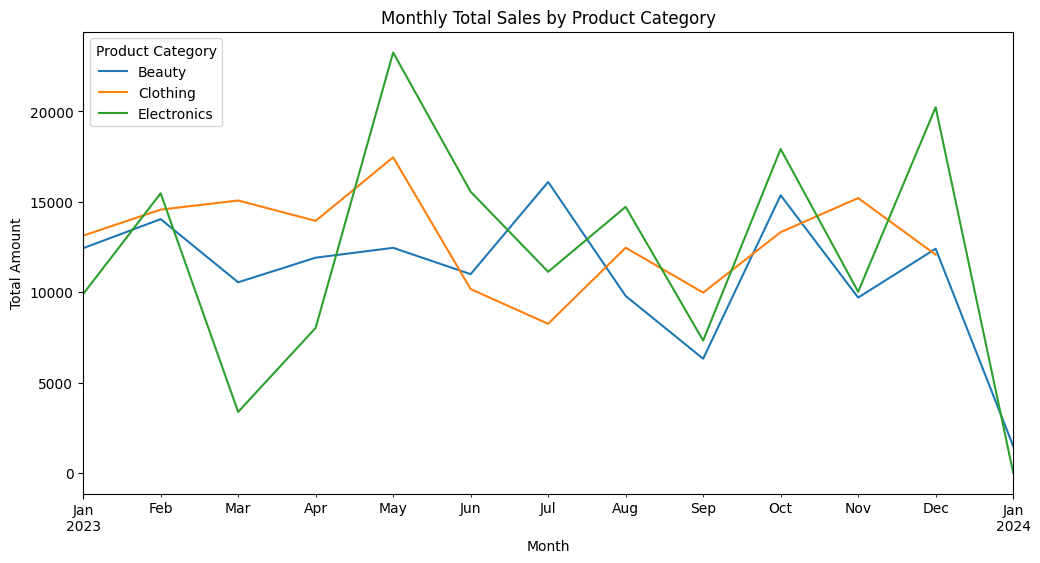

In [71]:
#Time Series Analysis to get monthly totals for each product category
monthly_sales = df.groupby('Product Category')['Total Amount'].resample('M').sum()

# Unstack to get a DataFrame where each product category is a column
monthly_sales = monthly_sales.unstack(level=0)

# Plotting
monthly_sales.plot(figsize=(12, 6))
plt.title('Monthly Total Sales by Product Category')
plt.ylabel('Total Amount')
plt.xlabel('Month')
plt.legend(title='Product Category')
plt.show()

From the above graph, we can see that the sales(total amount) for Electronics is relatively higher when compared to the other two product categories.

Gender
Female    510
Male      490
Name: count, dtype: int64


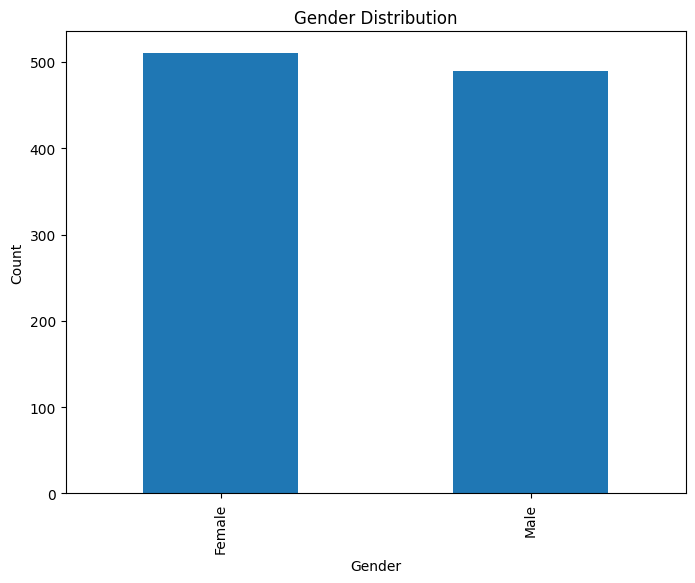

In [77]:
# Customer and Product Analysis

# Gender Distribution
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)
gender_distribution.plot(kind='bar', figsize=(8, 6))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

From the above graph, we can see that the number of female customers is comaparatively higher than the male customers(by a small margin).

Age
18    21
19    21
20    21
21    20
22    27
23    24
24    15
25    20
26    22
27    23
28    21
29    16
30    22
31    22
32    19
33    10
34    28
35    22
36    15
37    16
38    19
39    18
40    24
41    21
42    26
43    31
44    15
45    17
46    25
47    26
48    18
49    19
50    23
51    30
52    22
53    17
54    28
55    21
56    19
57    30
58    14
59    17
60    22
61    18
62    27
63    17
64    31
Name: count, dtype: int64


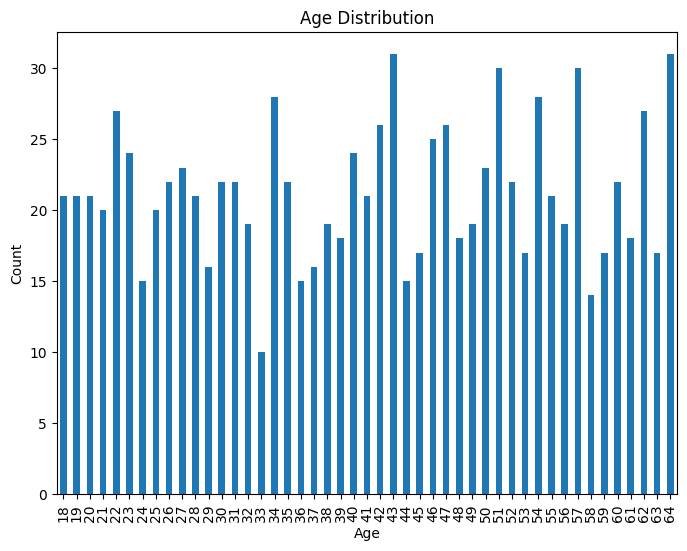

In [78]:
# Age Distribution
age_distribution = df['Age'].value_counts().sort_index()
print(age_distribution)
age_distribution.plot(kind='bar', figsize=(8, 6))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


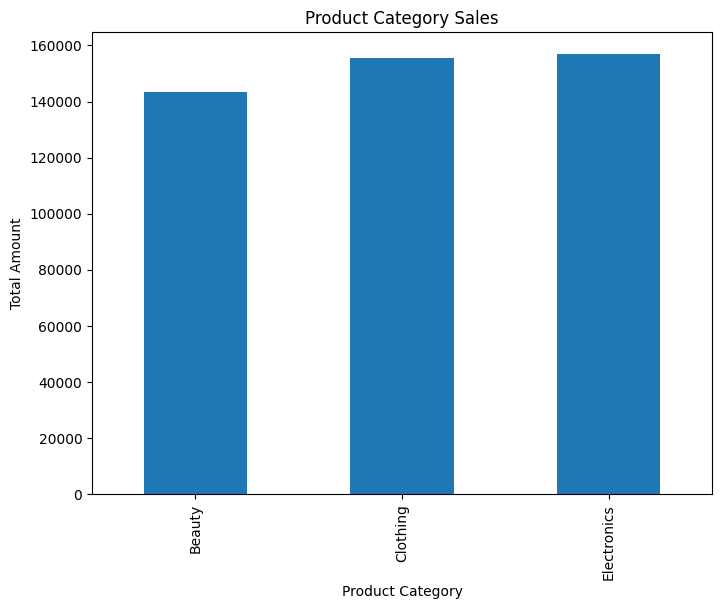

In [79]:
# Product Category Sales
product_category_sales = df.groupby('Product Category')['Total Amount'].sum()
print(product_category_sales)
product_category_sales.plot(kind='bar', figsize=(8, 6))
plt.title('Product Category Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

From the above graph, we can see that the Electonics have been sold for the heighest amount among the 3 product categories.
This shows that the sales of Electronics is the highest and the sales of beauty products is the lowest.

Gender            Female   Male
Product Category               
Beauty             74830  68685
Clothing           81275  74305
Electronics        76735  80170


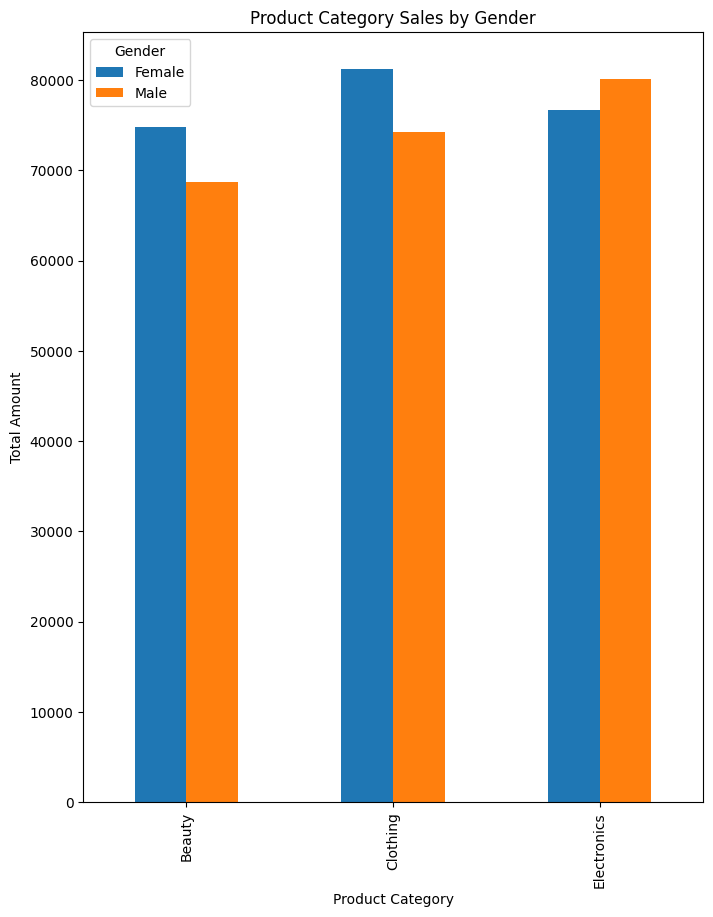

In [80]:
# Product Category Sales by Gender
product_category_gender_sales = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().unstack()
print(product_category_gender_sales)
product_category_gender_sales.plot(kind='bar', figsize=(8, 10))
plt.title('Product Category Sales by Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.legend(title='Gender')
plt.show()

Even though the total sales amount of Electronics is higher in general; when we group the product sales amount based on gender as in the above code, we can see that the Clothing sales amount is relatively higher when compared to all other total amounts.

From the above graph we can see that Females buy more Clothing and Beauty products while Males buy more Electronics.

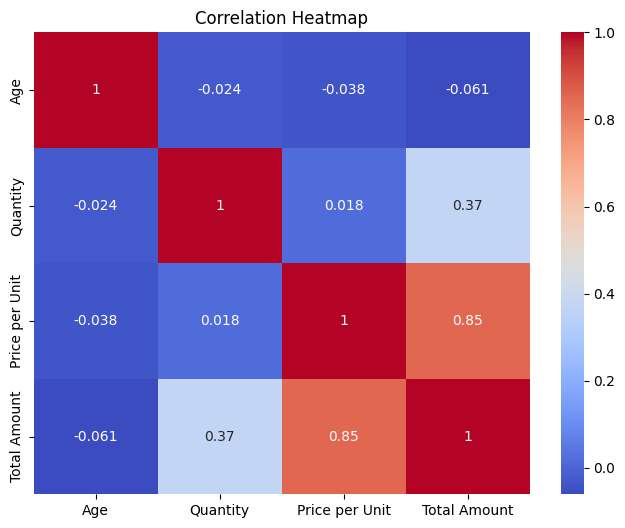

In [76]:
# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The above heat map gives the correlation between the specified columns.

**Recommendations:**

1.Focus marketing campaigns(for each category of products)
during peak sales months to capitalize on seasonal trends.

2.Optimize inventory based on product category sales trends.

3.Implement targeted marketing campaigns based on gender and age demographics. In general, people buy more electronics. But, females buy more clothing tha electronics. Hence plan marketing campaigns accordingly.